In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
df["Year"].fillna(df["Year"].median(), inplace=True)
df["Duration"] = pd.to_numeric(df["Duration"], errors='coerce')
df["Duration"].fillna(df["Duration"].median(), inplace=True)
df["Rating"].fillna(df["Rating"].median(), inplace=True)
df["Votes"] = pd.to_numeric(df["Votes"], errors='coerce')
df["Votes"].fillna(df["Votes"].median(), inplace=True)

In [7]:
df["Genre"].fillna(df["Genre"].mode()[0], inplace=True)
df["Director"].fillna(df["Director"].mode()[0], inplace=True)
df["Actor 1"].fillna(df["Actor 1"].mode()[0], inplace=True)
df["Actor 2"].fillna(df["Actor 2"].mode()[0], inplace=True)
df["Actor 3"].fillna(df["Actor 3"].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

Name            0
Year        15509
Duration    15509
Genre           0
Rating          0
Votes           0
Director        0
Actor 1         0
Actor 2         0
Actor 3         0
dtype: int64

In [9]:
df.shape

(15509, 10)

In [10]:
df.describe()

,Year,Duration,Rating,Votes
count,0.0,0.0,15509.000000,15509.000000
mean,NaN,NaN,5.919131,71.241989
std,NaN,NaN,0.990512,133.120371
min,NaN,NaN,1.100000,5.000000
25%,NaN,NaN,6.000000,35.000000
50%,NaN,NaN,6.000000,35.000000
75%,NaN,NaN,6.000000,35.000000
max,NaN,NaN,10.000000,999.000000


In [22]:
# Select numerical variables for the correlation matrix
numerical_vars = ['Duration', 'Rating', 'Year', 'Votes']


In [23]:

# Compute the correlation matrix
correlation_matrix = df[numerical_vars].corr()


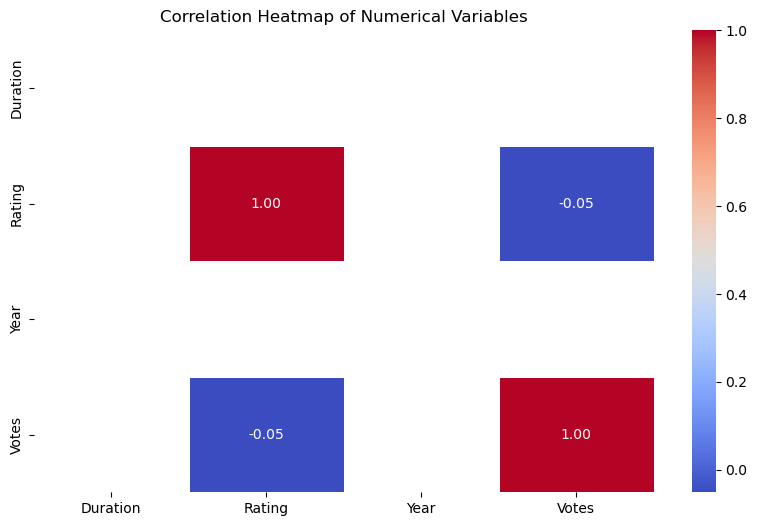

In [24]:

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [12]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [13]:
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'


In [14]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

In [16]:
preprocessor.fit(train_df[features])
train_features_encoded = preprocessor.transform(train_df[features])
test_features_encoded = preprocessor.transform(test_df[features])

In [17]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [18]:
# Train the model
model.fit(train_df[features], train_df[target])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [19]:
# Predict ratings for test data
predictions = model.predict(test_df[features])

In [20]:
# Evaluate the model
mse = mean_squared_error(test_df[target], predictions)
mse

3.475381088171034